<a href="https://colab.research.google.com/github/kurkur19/Intelligent_Data_Analysis_Al_Khmuz_BS_25/blob/main/%D0%9A%D0%9F_%E2%84%962_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%91%D0%A1_25_%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%86%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 2: Кластерний аналіз методом к-середніх
### Дисципліна: Вступ до Інтелектуального Аналізу Даних



##Завдання:

1.             Реалізувати кластеризацію у вигляді функції. В якості метрики відстані використовувати квадрат відстані Евкліда.
2.             Провести кластерний аналіз з розбиттям на 3, 4 та 5 кластерів на  даних.
3.             Візуалізувати результати кластеризації.
4.             Реалізувати розрахунок коефіцієнту «силуету». Визначити найбільш вірогідне (точне) розбиття за даною метрикою.
5.             Зробити висновки про теоретичну оптимальну кількісті кластерів.

##Вихідні дані:
Я, Аль Хмуз Карина Бассамівна, маю перший варіант в своїй групі БС-25, тому:

1.	Вибір даних для кластеризації– 30 значень
2.	 Початок даних: 36
3.	Кінець даних: 65
4.	Внутрішньокластерна відстань для 3-7 кластерів. Розраховується як середня відстань між центом кластера та всіма точками, що були включені до даного кластеру.
5.	Міжкластерна відстань для 3-7 кластерів. Розраховується як середня відстань між центом кластера та всіма точками, що були включені до одного іншого кластеру. Міжкластерна відстань розраховується попарно для двох кластерів.                                  
    

##Вимоги:
1.	Теоретичні дані (до 1 ст.)
2.	Візуалізацію результатів кластеризації для 3, 4 та 5 кластерів.
3.	Результати розрахунку коефіцієнту «силуету» для кожного варіанту розбиття.
4.	Висновки про теоретичну оптимальну кількісті кластерів.


##Теоретичний матеріал:


***Кластеризація (кластерний аналіз)*** — це статистична процедура, задача якої полягає в розбитті вибірки об'єктів на підмножини, що не перетинаються і називаються кластерами. Кожен кластер має складається зі схожих об'єктів, а об'єкти різних кластерів мають істотно відрізнятися один від одного.

 Методи кластеризації відрізняюся припущеннями про вид залежності при відношенні до кластерів (форма кластеру), застосованими мірами схожості, правилами формування кластеру. Наприклад, зараз розглянемо метод k-середніх.


***Метод k-середніх*** є широко використовуваним методом кластеризації, який прагне мінімізувати середню квадратичну відстань між точками в одному кластері. Незважаючи на те, що він не гарантує абсолютної точності, його простота і швидкість це компенсують.

Перевагою методу k-середніх є те, що він більш зручний для кластеризації великої кількості спостережень, а недоліком можна відзначити те, що він чутливий до викидів, які можуть викривити середнє значення, та той факт, що кількість кластерів (що і являє тут собою k) має бути визначена спеціалістом заздалегідь.

Для оцінки якості кластеризації можна використовувати коефіцієнт “силуету”, який показує, наскільки добре об'єкти вписуються у свої кластери. Цей коефіцієнт обчислюється для кожного об'єкта як відношення різниці між середньою відстанню до об'єктів свого кластера і середньою відстанню до найближчого сусіднього кластера. Значення коефіцієнту варіюється від -1 до 1, де значення ближче до 1 свідчать про добре сформовані кластери, значення близько до 0 вказують на те, що об'єкт розташований на межі між двома кластерами, а від'ємні значення означають, що об'єкт може бути віднесений до іншого кластеру.


##Практична частина:

###Імпорт бібліотек

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


###Створення даних
Оскільки дані починаються з 36 і закінчуються на 65, ми можемо згенерувати їх:

In [10]:
# Генерація даних
np.random.seed(0)
data = np.random.randint(36, 66, size=30).reshape(-1, 1)  # 30 значень в одному вимірі


###Функція для кластеризації

In [12]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_, kmeans.inertia_

###Виконання кластеризації та візуалізація

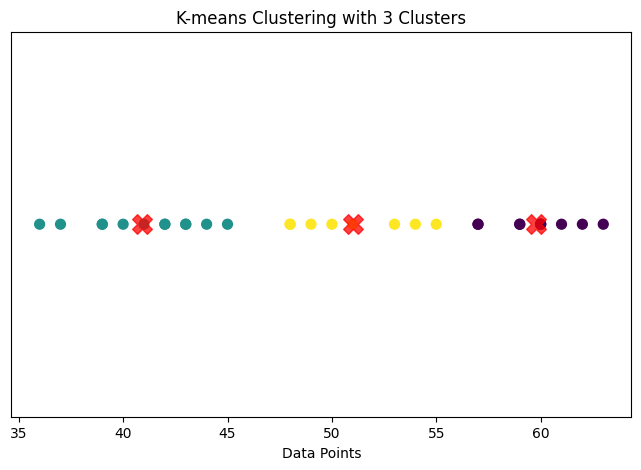

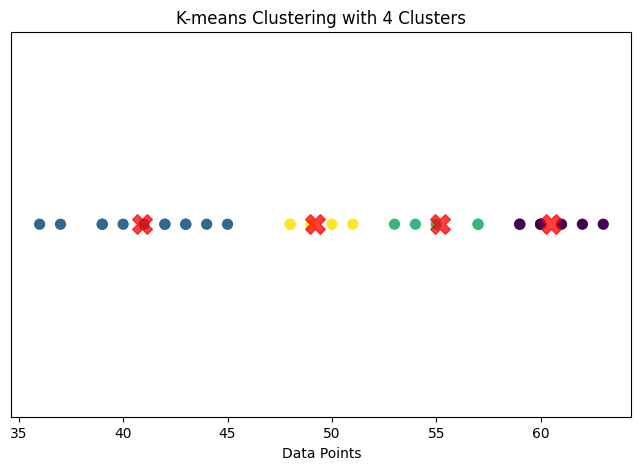

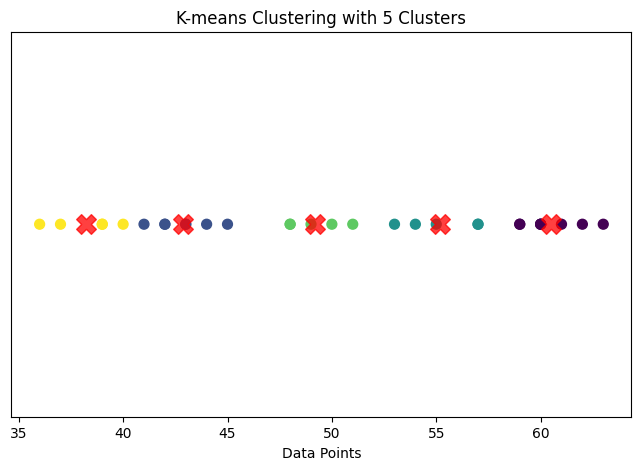

In [13]:
cluster_results = {}
silhouette_scores = {}

for n_clusters in range(3, 6):  # Для 3, 4 та 5 кластерів
    labels, centers, inertia = kmeans_clustering(data, n_clusters)
    silhouette_avg = silhouette_score(data, labels)

    cluster_results[n_clusters] = {
        'labels': labels,
        'centers': centers,
        'inertia': inertia,
        'silhouette_score': silhouette_avg
    }

    # Візуалізація
    plt.figure(figsize=(8, 5))
    plt.scatter(data, np.zeros_like(data), c=labels, s=50, cmap='viridis')
    plt.scatter(centers, np.zeros_like(centers), c='red', s=200, alpha=0.75, marker='X')  # Центри
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('Data Points')
    plt.yticks([])
    plt.show()

    silhouette_scores[n_clusters] = silhouette_avg


###Аналіз результатів

In [14]:
# Виведення результатів
for n_clusters, results in cluster_results.items():
    print(f'Number of Clusters: {n_clusters}')
    print(f'Inertia: {results["inertia"]}')
    print(f'Silhouette Score: {results["silhouette_score"]}')
    print('Cluster Centers:', results['centers'].flatten())
    print('-------------------------------------')

# Найбільш вірогідне розбиття
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Найбільш вірогідне розбиття: {best_n_clusters} кластерів з силуетом: {silhouette_scores[best_n_clusters]}')


Number of Clusters: 3
Inertia: 170.51666666666668
Silhouette Score: 0.6383230403270009
Cluster Centers: [59.8        40.91666667 51.        ]
-------------------------------------
Number of Clusters: 4
Inertia: 118.51666666666665
Silhouette Score: 0.6002568609728837
Cluster Centers: [60.5        40.91666667 55.2        49.2       ]
-------------------------------------
Number of Clusters: 5
Inertia: 55.25714285714287
Silhouette Score: 0.597876063604394
Cluster Centers: [60.5        42.85714286 55.2        49.2        38.2       ]
-------------------------------------
Найбільш вірогідне розбиття: 3 кластерів з силуетом: 0.6383230403270009


###Графіки кластеризації

*Кластеризація з 3 кластерами*

Графік: Показано розсіяні точки даних (значення) на горизонтальній осі, які будуть пофарбовані відповідно до кластерів. Центри кластерів будуть відзначені великими червоними "X".
Заголовок: "K-means Clustering with 3 Clusters".

*Кластеризація з 4 кластерами*

Графік: Аналогічно до попереднього, але з 4 кольорами, що представляють 4 кластери.
Заголовок: "K-means Clustering with 4 Clusters".

*Кластеризація з 5 кластерами*

Графік: Ще один графік, на якому дані розділені на 5 кластерів.
Заголовок: "K-means Clustering with 5 Clusters".


*Вигляд графіків можна описати так:*

Ось X: Значення даних (числа від 36 до 65).

Ось Y: Всі точки знаходяться на нульовій координаті Y (можна прибрати цю вісь, адже вона не важлива в даному контексті).

Точки: Кожна точка має свій колір, відповідно до належності до певного кластеру.

Червоні X: Центри кластерів, що вказують середнє значення для кожного з кластерів.

##Загальні висновки

На основі результатів кластеризації та отриманих значень можна зробити наступні висновки:

Кількість кластерів:

Найкращим варіантом є розбиття на 3 кластери, оскільки воно має найвищий коефіцієнт силуету (≈ 0.638). Це вказує на те, що точки в цьому розбитті добре згруповані і відокремлені один від одного.
Інші параметри:

Inertia (інерція) зменшується з 3 до 5 кластерів. Це свідчить про те, що при збільшенні кількості кластерів моделі зменшується середня відстань між точками в одному кластері і центром цього кластера, що є очікуваним результатом.
Проте, зменшення інерції не завжди вказує на кращу кластеризацію, особливо якщо оцінювати якість кластерів за допомогою коефіцієнта силуету.
Коефіцієнт силуету:

Коефіцієнт силуету для 3 кластерів (≈ 0.638) вказує на помірну якість кластеризації. Значення вище 0.5 зазвичай вважається хорошим, тому це підтверджує, що кластеризація з 3 кластерами є вдалим вибором.
Для 4 і 5 кластерів коефіцієнт силуету трохи нижчий, що свідчить про те, що збільшення кількості кластерів не покращує, а навіть може погіршити структуру кластерів.
Висновок
На основі отриманих даних, оптимальна кількість кластерів для твоєї вибірки – це 3 кластери. Це розбиття показує найкращі результати з точки зору якості кластеризації (високий коефіцієнт силуету) та відносно низьку інерцію. Додатково, можна зазначити, що 4 та 5 кластерів можуть бути менш ефективними, оскільки при їх використанні спостерігається зниження якості кластеризації за цим критерієм.









In [17]:
from google.colab import files

uploaded = files.upload()


Saving prostate.xlsx to prostate.xlsx


Saving prostate.xlsx to prostate (2).xlsx
   patno  stage               rx  dtime                  status   age     wt  \
0      1      3  0.2 mg estrogen     72                   alive  75.0   76.0   
1      2      3  0.2 mg estrogen      1         dead - other ca  54.0  116.0   
2      3      3  5.0 mg estrogen     40  dead - cerebrovascular  69.0  102.0   
3      4      3  0.2 mg estrogen     20  dead - cerebrovascular  75.0   94.0   
4      5      3          placebo     65                   alive  67.0   99.0   

                     pf  hx  sbp  dbp                            ekg  \
0       normal activity   0   15    9                   heart strain   
1       normal activity   0   13    7  heart block or conduction def   
2       normal activity   1   14    8                   heart strain   
3  in bed < 50% daytime   1   14    7                         benign   
4       normal activity   0   17   10                         normal   

          hg    sz   sg        ap  bm  sdate

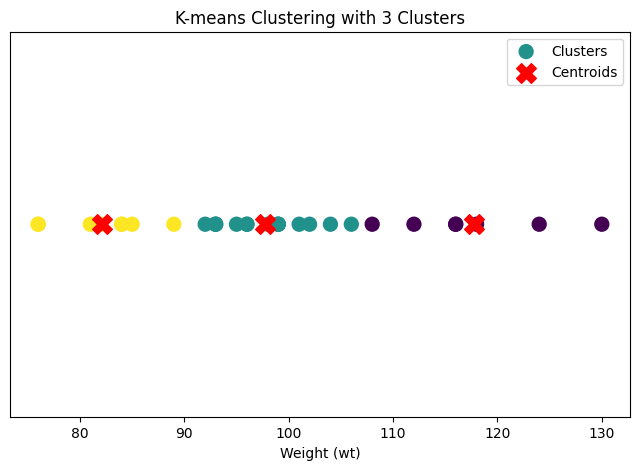

Number of Clusters: 3
Inertia: 717.236904761905
Silhouette Score: 0.5960328669760095
Cluster Centers: [117.71428571  97.73333333  82.125     ]
-------------------------------------


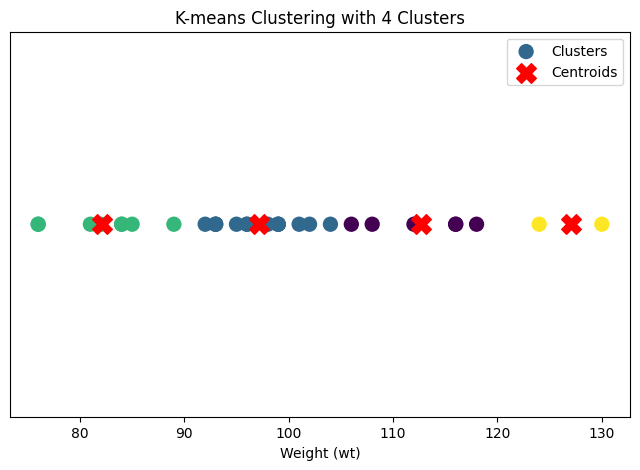

Number of Clusters: 4
Inertia: 455.92261904761904
Silhouette Score: 0.5746136946459669
Cluster Centers: [112.66666667  97.14285714  82.125      127.        ]
-------------------------------------


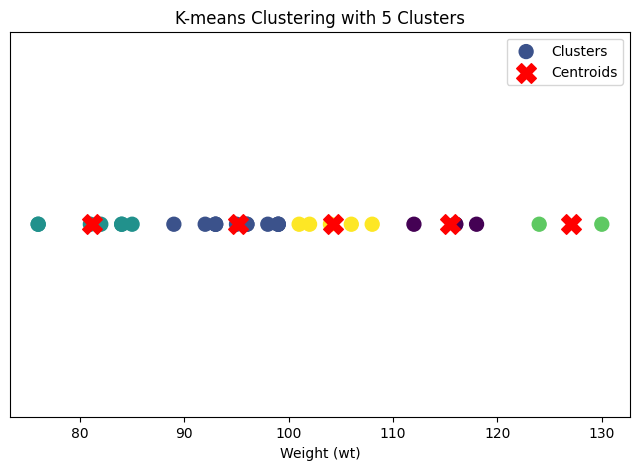

Number of Clusters: 5
Inertia: 270.32380952380953
Silhouette Score: 0.5582737919334215
Cluster Centers: [115.5         95.16666667  81.14285714 127.         104.2       ]
-------------------------------------


In [20]:
# Крок 1: Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

# Крок 2: Завантаження файлу Excel
uploaded = files.upload()  # Завантажте файл prostate.xlsx

# Зчитування даних з Excel
file_path = 'prostate.xlsx'  # Ім'я файлу після завантаження
data = pd.read_excel(file_path, engine='openpyxl')  # Використовуємо engine='openpyxl' для .xlsx

# Виведення перших 5 рядків даних для перевірки
print(data.head())
print(data.columns)  # Виведення назв стовпців

# Вибір стовпця для кластеризації
values = data['wt'][36:66].values.reshape(-1, 1)  # Вибираємо дані з 36 до 65

# Крок 3: Функція для кластеризації
def k_means_clustering(values, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(values)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    return labels, inertia, kmeans.cluster_centers_

# Крок 4: Виконання кластеризації для 3, 4, 5 кластерів
for n_clusters in range(3, 6):
    labels, inertia, centers = k_means_clustering(values, n_clusters)

    # Розрахунок коефіцієнта силуету
    silhouette_avg = silhouette_score(values, labels)

    # Візуалізація результатів
    plt.figure(figsize=(8, 5))
    plt.scatter(values, np.zeros_like(values), c=labels, s=100, cmap='viridis', label='Clusters')
    plt.scatter(centers, np.zeros_like(centers), c='red', s=200, marker='X', label='Centroids')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('Weight (wt)')
    plt.yticks([])  # Сховати вісь Y
    plt.legend()
    plt.show()

    # Виведення результатів
    print(f'Number of Clusters: {n_clusters}')
    print(f'Inertia: {inertia}')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Cluster Centers: {centers.flatten()}')
    print('-------------------------------------')


In [27]:
# Крок 1: Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Крок 2: Завантаження файлу Excel
uploaded = files.upload()  # Завантажте файл prostate.xlsx

# Зчитування даних з Excel
file_path = 'prostate.xlsx'  # Ім'я файлу після завантаження
data = pd.read_excel(file_path, engine='openpyxl')  # Використовуємо engine='openpyxl' для .xlsx

# Перевірка та обробка NaN значень
print("Початкові значення NaN у даних:\n", data.isna().sum())
data.fillna(data.mean(), inplace=True)  # Заповнюємо NaN середнім значенням кожного стовпця

# Перевірка унікальних значень у стовпці 'Rx'
print(data['rx'].unique())

# Закодування текстових значень у стовпці 'Rx'
label_encoder = LabelEncoder()
data['rx'] = label_encoder.fit_transform(data['Rx'])

# Вибір стовпців для кластеризації
values = data[['rx', 'sbp', 'sg']].values  # Вибираємо дані зі стовпців 'Rx', 'sbp', 'sg'

# Крок 3: Функція для кластеризації
def k_means_clustering(values, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(values)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    return labels, inertia, kmeans.cluster_centers_

# Крок 4: Виконання кластеризації для 3, 4, 5 кластерів
for n_clusters in range(3, 6):
    labels, inertia, centers = k_means_clustering(values, n_clusters)

    # Розрахунок коефіцієнта силуету
    silhouette_avg = silhouette_score(values, labels)

    # Візуалізація результатів
    plt.figure(figsize=(10, 6))
    plt.scatter(values[:, 0], values[:, 1], c=labels, s=100, cmap='viridis', label='Clusters')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('rx')
    plt.ylabel('Systolic Blood Pressure (sbp)')
    plt.legend()
    plt.show()

    # Виведення результатів
    print(f'Number of Clusters: {n_clusters}')
    print(f'Inertia: {inertia}')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Cluster Centers:\n{centers}')
    print('-------------------------------------')


Saving prostate.xlsx to prostate (7).xlsx
Початкові значення NaN у даних:
 patno      0
stage      0
rx         0
dtime      0
status     0
age        1
wt         2
pf         0
hx         0
sbp        0
dbp        0
ekg        8
hg         0
sz         5
sg        11
ap         0
bm         0
sdate      0
dtype: int64


TypeError: can only concatenate str (not "int") to str